In [1]:
#Import various libraries, which will be used later

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from ipywidgets import interact, fixed
import ipywidgets as widgets

In [2]:
L = 10**(-10) #width of the infinite well
A = np.sqrt(2 / L) # normalisation constant
w = 0.2 * L #width of the central square perturbation

m = 9.11 * 10**(-31) #Particle mass in Kg (in this case mass of an electron)
e = 1.6 * 10**(-19) #an electron volt
hbar = (6.626 * 10**(-34)) / (2 * np.pi) #Planck's constant divided by 2Pi

N = 100 #number of x-positions over which we will sample

In [3]:
def energy(n):
    """
    Function to calculate the energy of the particle in an infinite 
    potential well in a particular quantum state
    
    Returns:
        energy : float
                 the energy of the particle
                 
    Parameter:
        n : integer
            the state of the wavefunction
    """
    
    energy = (n**2 * (np.pi)**2 * (hbar**2)) / (2 * m * L**2)
    return energy

In [4]:
def unperturbed(n, x):
    """
    Function to calculate the value of the wavefunction at a given point in the infinite potential well
    
    Returns:
        psi : float
              the value of the wavefunction
        
    Parameters:
        n : integer
            the order of the wavefunction
            
        x : float
            the position of the particle in the infinite potential well
    """
    
    psi = A * np.sin((n * np.pi * x) / L) #the solution to the unperturbed wavefunction in an infinite potential well
    return psi

In [5]:
def integral(k, n, V, w):
    """
    Function to calculate individual integrals, which will later be summed when finding the first-order
    correction to the wavefunction.
    
    Returns:
        perturb_1 : float
        
    Parameters:
        k : integer
            dummy variable. represents the principle quantum number and is what we will sum over in a later function
        
        n : integer
            principle quantum number
            
        V : float
            magnitude of the square perturbation
            
        w : float
            width of the central square pertubation
    """
    
    if w > L:
        print ("Perturbation width exceeds that of the infinite well. Reduce perturbation width.")
        
    else:
        def integrand(x):
            """
            Function to establish the integrand to be used when calculating the perturbation. Must do this 
            as cannot square the 'solution' function which is previously defined
            """
            
            return (A * np.sin((n * np.pi * x) / L)) * (np.conj(A * np.sin((k * np.pi * x) / L))) * V
        
        perturb_1 = quad(integrand, L/2 - w/2, L/2 + w/2)
        return perturb_1[0]

In [6]:
def sum_1(n, kmax, V, w):
    """
    Function to store integral values which will later be used to find the value of the corrected wavefunction.
    
    Returns:
        sum_1 : array
                array containing coefficients which will be used to find the corrected wavefunction.
        
    Parameters:
        n : integer
            principle quantum number
            
        kmax : integer
               value of the dummy variable up to which we will sample
        
        V : float
            magnitude of the square perturbation
        
        w : float
            width of the central square pertubation
    """
    sum_1 = []
    
    for i in range(1, kmax + 1):
        if i == n:
            sum_1 = np.append(sum_1, 0)
        else:
            value = integral(i, n, V, w) / (energy(n) - energy(i))
            sum_1 = np.append(sum_1, value)
    
    return sum_1

In [7]:
def psi_correc(n, kmax, V, w):
    new_psi = [] #empty array to store (first-order) corrected wavefunctions
    
    for x in np.arange(0, L, L / N):
        value = 0
        
        for i in range(1, kmax + 1):
            value += (sum_1(n, kmax, V, w)[i - 1] * unperturbed(i, x))
        
        new_psi = np.append(new_psi, value + unperturbed(n, x))
    
    return new_psi

In [8]:
@interact(n = (1, 3, 1), kmax = fixed(10), V = (0.0, 1e4, 1e3), w = (0.0, L * 1e10, 0.1))
def plot_psi(n, kmax, V, w):
    x_pos = np.linspace(0, L, N)
    
    #set the size of the figures
    fig = plt.figure(figsize = (8, 9))
    
    ax = fig.add_subplot(111)
     
    #general plot formatting
    ax.plot(x_pos, psi_correc(n, kmax, V * e, w * L))
    #ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
    
    plt.xlabel('x-position')
    plt.ylabel('Corrected wavefunction')
    plt.title('n = %i, V = %.1e eV, w = %.2e Angstroms' %(n, V, w))
    return plt.show()

interactive(children=(IntSlider(value=2, description='n', max=3, min=1), FloatSlider(value=5000.0, description…

In [9]:
def psi_vs_V(n, kmax, Vmax, Vinc, w):
    psi = []
    
    for v in np.arange(0, Vmax, Vmax / Vinc):
        new_psi = [] #empty array to store (first-order) corrected wavefunctions
    
        for x in np.arange(0, L, L / N):
            value = 0
        
            for i in range(1, kmax + 1):
                value += (sum_1(n, kmax, v, w)[i - 1] * unperturbed(i, x))
        
            new_psi.append(value + unperturbed(n, x))
            
        psi.append(new_psi)
        
    return psi

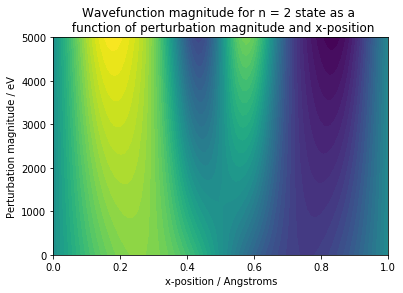

In [10]:
def psi_V_plot(n, kmax, Vmax, Vinc, w):
    x = np.linspace(0, L / 10**(-10), N)
    V = np.linspace(0, Vmax / e, Vinc)
    
    psi = psi_vs_V(n, kmax, Vmax, Vinc, w)
    
    plt.contourf(x, V, psi, 50)
    plt.xlabel('x-position / Angstroms')
    plt.ylabel('Perturbation magnitude / eV')
    plt.title('Wavefunction magnitude for n = %i state as a \n function of perturbation magnitude and x-position' %n)
    plt.show()

psi_V_plot(2, 10, 5000*e, 10, w)